In [1]:
# import previos notbook
%run 0.1-thomas-process_data.ipynb

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1270k  100 1270k    0     0  1857k      0 --:--:-- --:--:-- --:--:-- 1857k
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 873 entries, Province/State to 6/8/22
dtypes: float64(2), int64(869), object(2)
memory usage: 1.9+ MB


## Explore data

### Read data

In [2]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [3]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247665 entries, 0 to 247664
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  247665 non-null  object
 1   date            247665 non-null  object
 2   value           247665 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.7+ MB


In [4]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Explore data

In [5]:
sns.set_style("whitegrid")

In [6]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

#### Appearance of new covid-19 cases in Latam

Subset data.

In [7]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


Plot time series.

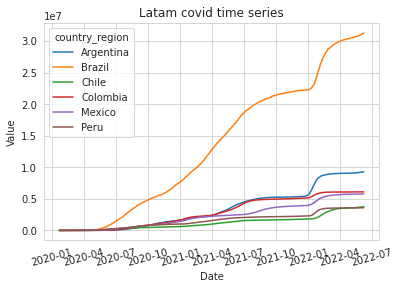

In [8]:
import configuration_of_enviroment_course_project.visualization.visualize as visualize

visualize.covid_time_series(some_latam_countries_df)

#### Latam in global context

Top `n` countries.

In [9]:
top_countries_df = visualize.top_countries_df_gen(processed_covid_df,countries)
top_countries_df

,country_region,value,color
0,US,27341470371,lightblue
1,India,16966536308,lightblue
2,Brazil,11617850855,red
3,France,6135380659,lightblue
4,United Kingdom,5559613353,lightblue
5,Russia,5008106402,lightblue
6,Germany,4356154103,lightblue
7,Turkey,4302869135,lightblue
8,Italy,3807920772,lightblue
9,Spain,3395045220,lightblue


Plot to Latam in highlighted bars.

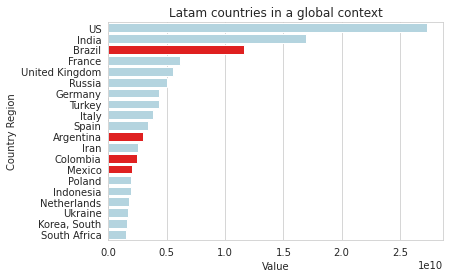

In [10]:
visualize.genertate_bar_plot_top_countries(processed_covid_df,countries)